In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [25]:
bd_data = 'State_of_data_2022.csv'

dados = pd.read_csv(bd_data)
dados = dados.drop(dados.columns[0], axis=1) #retirando a coluna ID

In [26]:
# Função que cria data frames com base em índices de colunas
def cria_df(lista):
    return dados[dados.columns[lista[0]:lista[1]]].copy()

In [27]:
# Função que renomeia as colunas dos data frames (recebe o data frame e a lista com os novos nomes)
def renomeia_coluna_df(data_frame, lista_novos_nomes):
    lista_novos_nomes = [nome.lower() for nome in lista_novos_nomes]
    data_frame.columns = lista_novos_nomes
    return data_frame

In [28]:
# Função retira as linhas nulas
def tira_linhas_na(data_frame):
    data_frame.dropna(inplace=True)
    return data_frame


**1- Dados Demográficos**


In [33]:
df_demografico1 = cria_df([0, 16])
df_demografico1 = df_demografico1.drop(df_demografico1.columns[5], axis=1) #dropando colunas de resposta aberta
df_demografico1 = df_demografico1.drop(df_demografico1.columns[5], axis=1) #dropando colunas de resposta aberta
df_demografico1.columns

Index(['('P1_a ', 'Idade')', '('P1_a_1 ', 'Faixa idade')',
       '('P1_b ', 'Genero')', '('P1_c ', 'Cor/raca/etnia')',
       '('P1_d ', 'PCD')', '('P1_g ', 'vive_no_brasil')',
       '('P1_i ', 'Estado onde mora')', '('P1_i_1 ', 'uf onde mora')',
       '('P1_i_2 ', 'Regiao onde mora')', '('P1_j ', 'Mudou de Estado?')',
       '('P1_k ', 'Regiao de origem')', '('P1_l ', 'Nivel de Ensino')',
       '('P1_m ', 'Área de Formação')',
       '('P2_a ', 'Qual sua situação atual de trabalho?')'],
      dtype='object')

In [37]:
novos_nomes1 = ['Idade','Faixa_idade','Genero','Cor_raca_etnia','PCD','vive_no_brasil','Estado_onde_mora','uf_onde_mora','Regiao_onde_mora','Mudou_de_Estado?','Regiao_de_origem','Nivel_de_Ensino','Área_de_Formação','Qual_sua_situação_atual_de_trabalho?']

renomeia_coluna_df(df_demografico1,novos_nomes1)
df_demografico1.head()

,idade,faixa_idade,genero,cor_raca_etnia,pcd,vive_no_brasil,estado_onde_mora,uf_onde_mora,regiao_onde_mora,mudou_de_estado?,regiao_de_origem,nivel_de_ensino,área_de_formação,qual_sua_situação_atual_de_trabalho?
0,39.0,35-39,Masculino,Parda,Não,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público
1,32.0,30-34,Masculino,Parda,Não,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias,Empregado (CLT)
2,53.0,50-54,Masculino,Branca,Não,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT)
3,27.0,25-29,Masculino,Branca,Não,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,Empregado (CLT)
4,46.0,45-49,Feminino,Branca,Não,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público


In [38]:
df_demografico1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   idade                                 4197 non-null   float64
 1   faixa_idade                           4271 non-null   object 
 2   genero                                4262 non-null   object 
 3   cor_raca_etnia                        4271 non-null   object 
 4   pcd                                   4271 non-null   object 
 5   vive_no_brasil                        4271 non-null   bool   
 6   estado_onde_mora                      4156 non-null   object 
 7   uf_onde_mora                          4156 non-null   object 
 8   regiao_onde_mora                      4171 non-null   object 
 9   mudou_de_estado?                      4171 non-null   object 
 10  regiao_de_origem                      772 non-null    object 
 11  nivel_de_ensino  

In [39]:
df_demografico1.shape

(4271, 14)

In [40]:
df_demografico1.isnull().sum()

idade                                     74
faixa_idade                                0
genero                                     9
cor_raca_etnia                             0
pcd                                        0
vive_no_brasil                             0
estado_onde_mora                         115
uf_onde_mora                             115
regiao_onde_mora                         100
mudou_de_estado?                         100
regiao_de_origem                        3499
nivel_de_ensino                            0
área_de_formação                         122
qual_sua_situação_atual_de_trabalho?       0
dtype: int64

In [41]:
df_demografico1.describe()

,idade
count,4197.000000
mean,31.169168
std,6.902803
min,18.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,54.000000


In [170]:
#df_demografico1.dropna(subset=["genero"],inplace=True)

In [42]:
df_demografico1["genero"].unique()

array(['Masculino', 'Feminino', nan, 'Prefiro não informar'], dtype=object)

In [43]:
df_demografico1.loc[df_demografico1["genero"].isnull()] = "Prefiro não informar"

In [45]:
df_demografico1["idade"].unique()

array([39.0, 32.0, 53.0, 27.0, 46.0, 21.0, 31.0, 33.0, nan, 25.0, 24.0,
       35.0, 28.0, 29.0, 26.0, 37.0, 34.0, 40.0, 18.0, 30.0, 38.0, 48.0,
       43.0, 44.0, 50.0, 22.0, 36.0, 51.0, 20.0, 23.0, 42.0, 47.0, 41.0,
       45.0, 'Prefiro não informar', 54.0, 49.0, 52.0, 19.0], dtype=object)

In [46]:
media_nao_inf1 = df_demografico1.loc[(df_demografico1["genero"] == "Prefiro não informar") & (df_demografico1["idade"] != "Prefiro não informar"),"idade"].mean()


In [47]:
#media_masc1 = int(df_demografico1[df_demografico1["genero"] == "Masculino"][("idade")].mean())
media_masc1 = df_demografico1.loc[df_demografico1["genero"] == "Masculino", "idade"].mean()


In [48]:
#media_fem1 = (df_demografico1[df_demografico1["genero"] == "Feminino"][("idade")].mean())
media_fem1 = df_demografico1.loc[df_demografico1["genero"] == "Feminino", "idade"].mean()


In [49]:
#df_demografico1[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Feminino"),"idade"] = media_fem1 - precisa do .loc
# Substitua as idades nulas das mulheres pela média calculada
df_demografico1.loc[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Feminino"), "idade"] = int(media_fem1)

df_demografico1.loc[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Masculino"), "idade"] = int(media_masc1)

df_demografico1.loc[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Prefiro não informar"), "idade"] = int(media_nao_inf1)



In [50]:
indices_remover1 = df_demografico1[df_demografico1["idade"] == "Prefiro não informar"].index
df_demografico1.drop(indices_remover1,inplace=True)

In [51]:
df_demografico1["idade"] = df_demografico1["idade"].astype(int)


In [52]:
df_demografico1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4262 entries, 0 to 4270
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   idade                                 4262 non-null   int32 
 1   faixa_idade                           4262 non-null   object
 2   genero                                4262 non-null   object
 3   cor_raca_etnia                        4262 non-null   object
 4   pcd                                   4262 non-null   object
 5   vive_no_brasil                        4262 non-null   object
 6   estado_onde_mora                      4147 non-null   object
 7   uf_onde_mora                          4147 non-null   object
 8   regiao_onde_mora                      4162 non-null   object
 9   mudou_de_estado?                      4162 non-null   object
 10  regiao_de_origem                      770 non-null    object
 11  nivel_de_ensino                    

Nivel de ensino x Situação de Trabalho (radar)
Area de formação x Genero (grafico de barras empilhadas com tab de legenda)

In [65]:
df_demografico1["qual_sua_situação_atual_de_trabalho?"].unique()

array(['Servidor Público', 'Empregado (CLT)',
       'Trabalho na área Acadêmica/Pesquisador',
       'Empreendedor ou Empregado (CNPJ)',
       'Desempregado, buscando recolocação', 'Estagiário',
       'Prefiro não informar', 'Somente Estudante (pós-graduação)',
       'Freelancer', 'Desempregado e não estou buscando recolocação',
       'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
       'Somente Estudante (graduação)',
       'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil'],
      dtype=object)

In [66]:
df_demografico1["nivel_de_ensino"].unique()

array(['Pós-graduação', 'Graduação/Bacharelado', 'Doutorado ou Phd',
       'Estudante de Graduação', 'Mestrado', 'Não tenho graduação formal',
       'Prefiro não informar'], dtype=object)

In [80]:
contagem = df_demografico1.groupby(["nivel_de_ensino", "qual_sua_situação_atual_de_trabalho?"]).size().reset_index(name="Contagem")

# Crie um DataFrame a partir da contagem
df_contagem = pd.DataFrame(contagem)

# Exiba o DataFrame
df_contagem.head()

,nivel_de_ensino,qual_sua_situação_atual_de_trabalho?,Contagem
0,Doutorado ou Phd,Desempregado e não estou buscando recolocação,1
1,Doutorado ou Phd,"Desempregado, buscando recolocação",9
2,Doutorado ou Phd,Empreendedor ou Empregado (CNPJ),20
3,Doutorado ou Phd,Empregado (CLT),100
4,Doutorado ou Phd,Freelancer,1


In [54]:
df_demografico1.head()

,idade,faixa_idade,genero,cor_raca_etnia,pcd,vive_no_brasil,estado_onde_mora,uf_onde_mora,regiao_onde_mora,mudou_de_estado?,regiao_de_origem,nivel_de_ensino,área_de_formação,qual_sua_situação_atual_de_trabalho?
0,39,35-39,Masculino,Parda,Não,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público
1,32,30-34,Masculino,Parda,Não,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias,Empregado (CLT)
2,53,50-54,Masculino,Branca,Não,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT)
3,27,25-29,Masculino,Branca,Não,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,Empregado (CLT)
4,46,45-49,Feminino,Branca,Não,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público


In [64]:
df_demografico1["qual_sua_situação_atual_de_trabalho?"].unique()

array(['Servidor Público', 'Empregado (CLT)',
       'Trabalho na área Acadêmica/Pesquisador',
       'Empreendedor ou Empregado (CNPJ)',
       'Desempregado, buscando recolocação', 'Estagiário',
       'Prefiro não informar', 'Somente Estudante (pós-graduação)',
       'Freelancer', 'Desempregado e não estou buscando recolocação',
       'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
       'Somente Estudante (graduação)',
       'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil'],
      dtype=object)

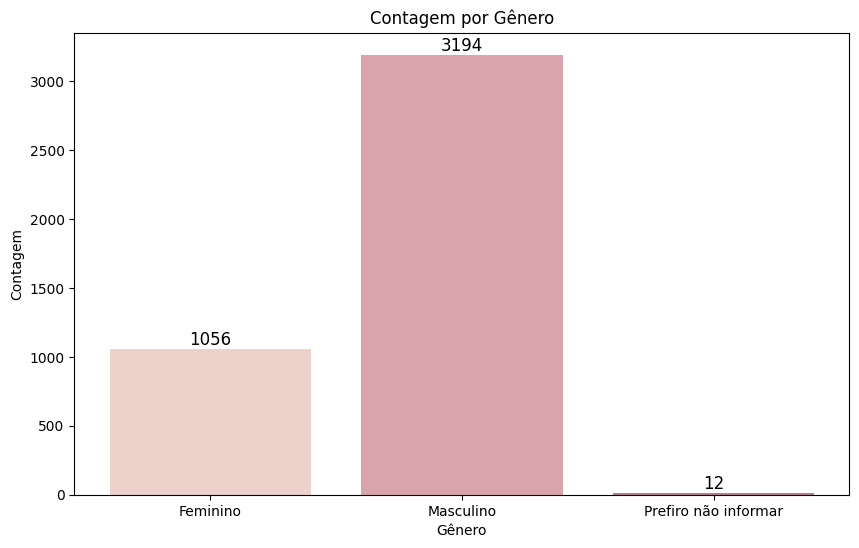

In [61]:
# Calcular a contagem de cada categoria na coluna 'genero'
grupo_genero = df_demografico1.groupby("genero")["idade"].count()

# Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(grupo_genero.index, grupo_genero.values, color=sns.cubehelix_palette())

# Adicionar os números absolutos acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=12, color='black')

# Adicionar rótulos e título
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.title("Contagem por Gênero")

plt.show()

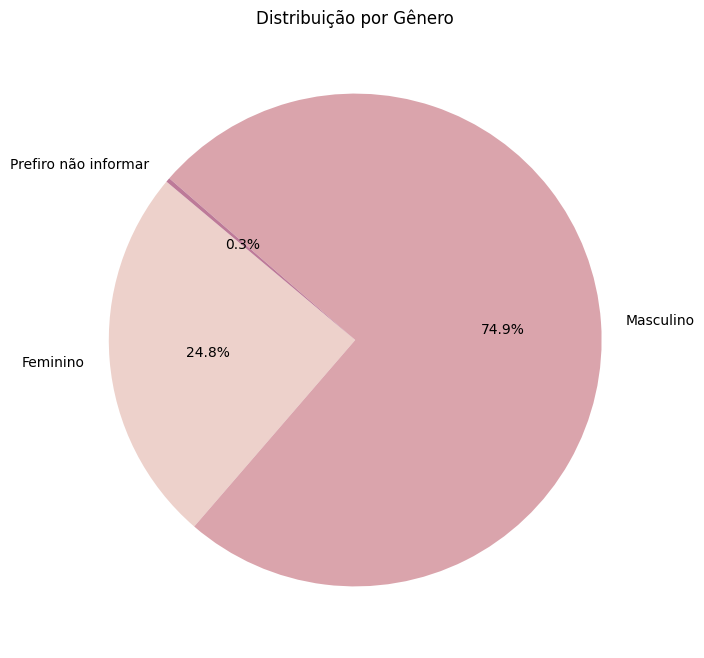

In [71]:
# Calcular a contagem de cada categoria na coluna 'genero'
grupo_genero = df_demografico1.groupby("genero")["idade"].count()

# Configurar o gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(grupo_genero, labels=grupo_genero.index, autopct='%1.1f%%', startangle=140, colors=sns.cubehelix_palette())

# Adicionar título
plt.title("Distribuição por Gênero")

# Adicionar os números absolutos nas bordas das fatias
for i, (wedge, label) in enumerate(zip(wedges, grupo_genero.index)):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = 0.5 * wedge.r * np.cos(np.deg2rad(angle))
    y = 0.5 * wedge.r * np.sin(np.deg2rad(angle))
    #plt.text(x, y, f"{grupo_genero[label]}", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

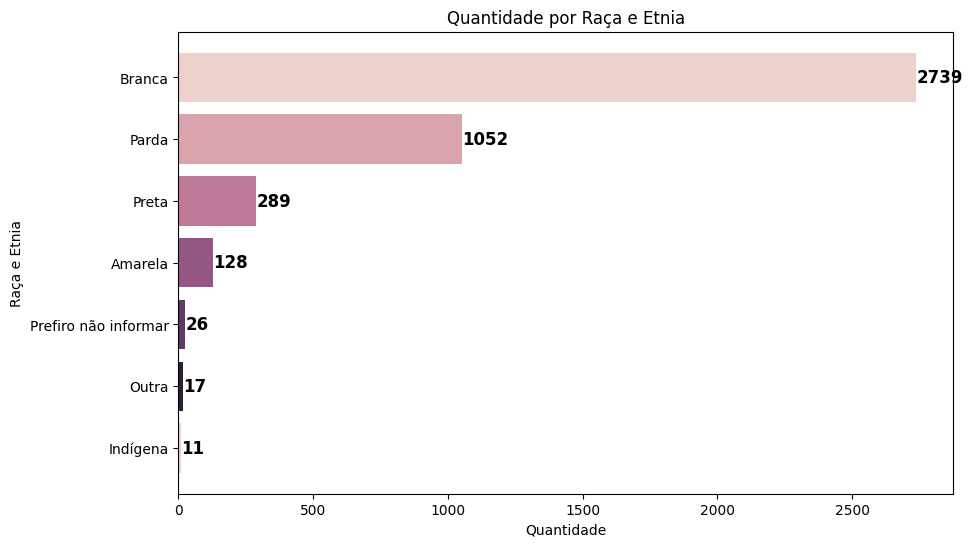

In [63]:
# Calcular a contagem de cada categoria na coluna 'cor_raca_etnia'
contagem_cor_raca = df_demografico1["cor_raca_etnia"].value_counts()

# Configurar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(contagem_cor_raca.index, contagem_cor_raca.values, color=sns.cubehelix_palette())

# Adicionar os valores acima das barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center', color='black', fontsize=12, fontweight='bold')

# Adicionar rótulos e título
plt.xlabel("Quantidade")
plt.ylabel("Raça e Etnia")
plt.title("Quantidade por Raça e Etnia")

# Inverter a ordem das categorias para ficar em ordem decrescente
plt.gca().invert_yaxis()

plt.show()